In [1]:
!pip install imblearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\RAKESH~1\AppData\Local\Temp\Rar$DIa3004.14953\Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df.shape

(209593, 37)

In [5]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [6]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
df=df.drop(['Unnamed: 0','msisdn'],axis=1)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [8]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [9]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [10]:
cat_df=df.select_dtypes(exclude=['object'])
cat_df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [11]:
## detecting the outliers

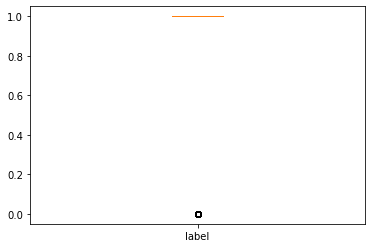

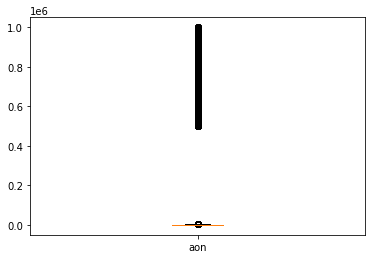

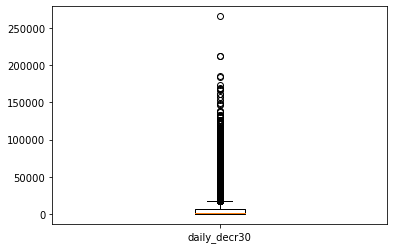

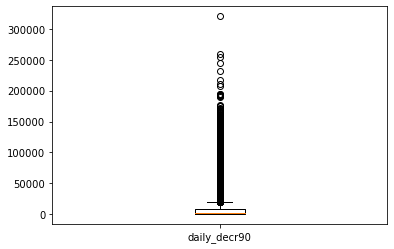

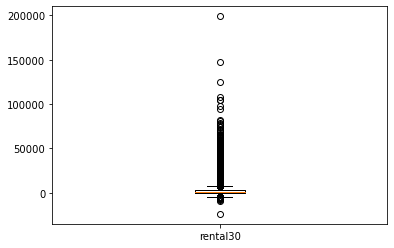

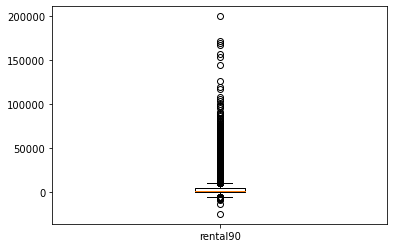

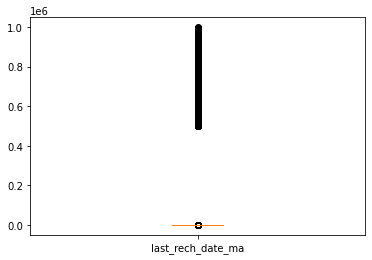

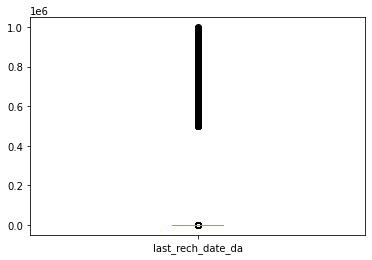

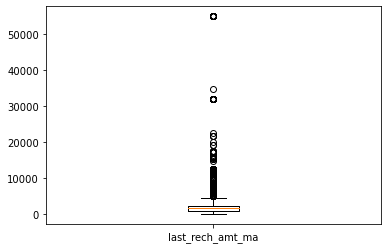

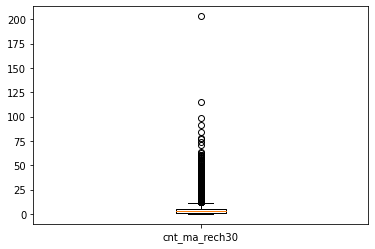

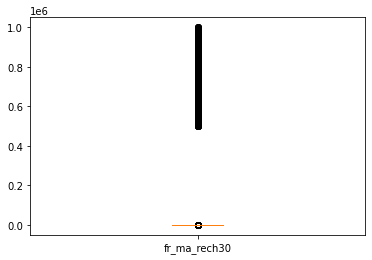

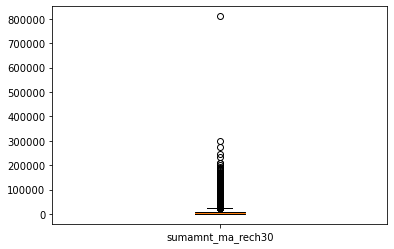

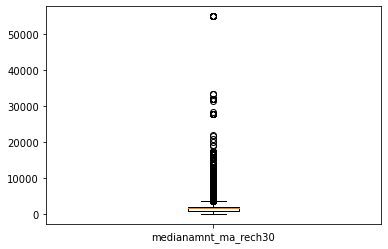

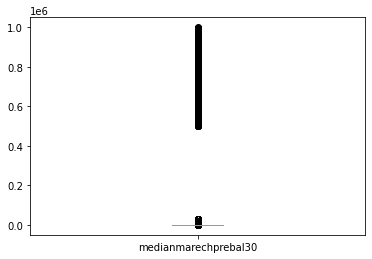

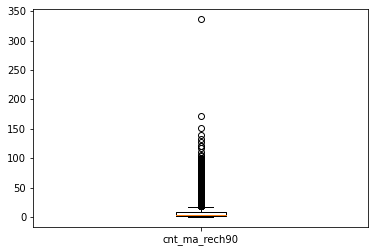

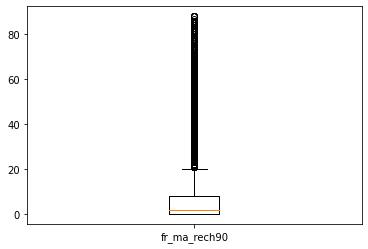

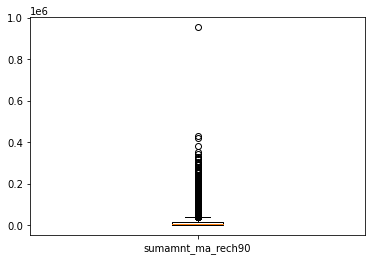

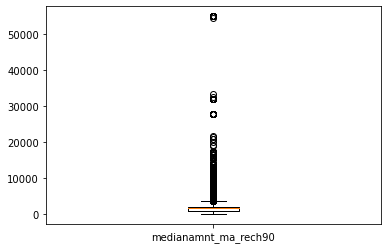

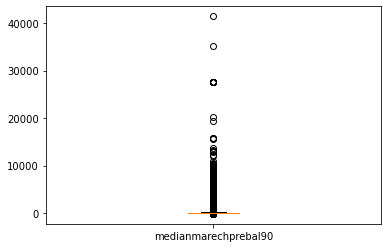

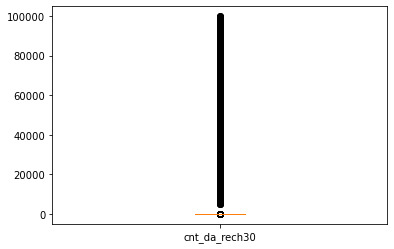

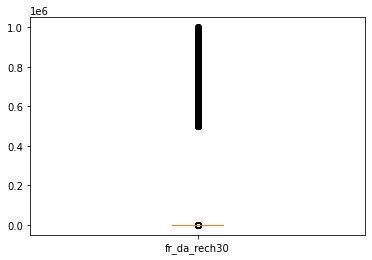

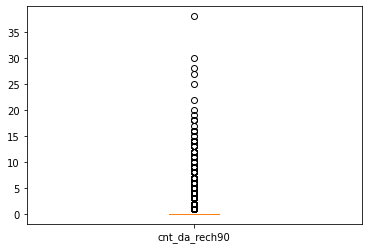

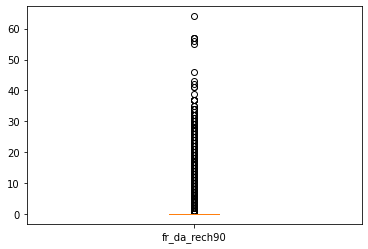

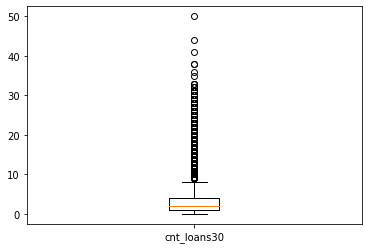

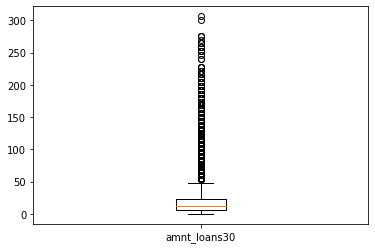

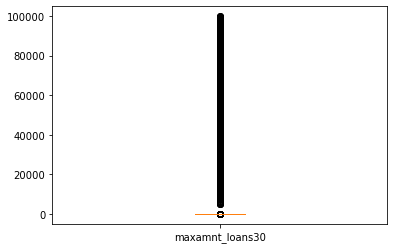

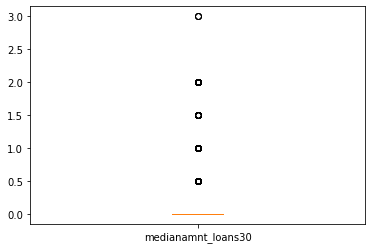

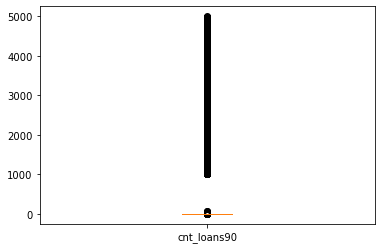

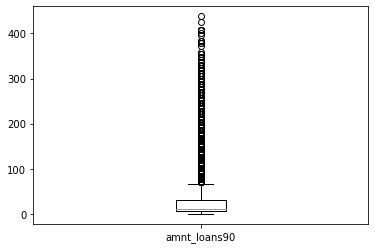

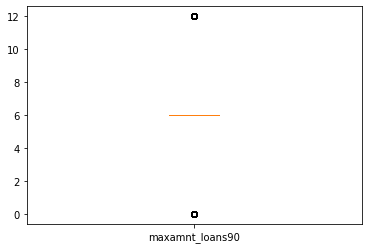

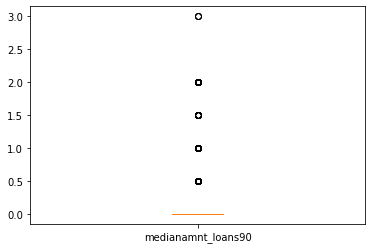

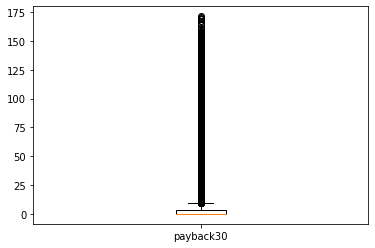

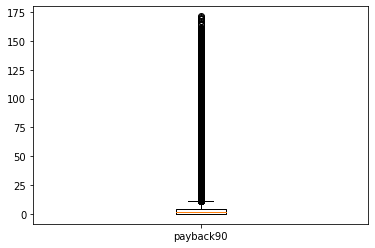

In [12]:
for i in cat_df:
    plt.boxplot(cat_df[i], labels = [i])
    plt.show()

In [13]:
## removing the outliers using iqr

In [14]:
out_vars=['aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma','last_rech_date_da','last_rech_amt_ma','cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','cnt_loans30','amnt_loans30','maxamnt_loans30','medianamnt_loans30','cnt_loans90','amnt_loans90','maxamnt_loans90','medianamnt_loans90','payback30','payback90']

In [15]:
def outlierTreat(x):
    upper = x.quantile(.75) + 1.5 * (x.quantile(.75) - x.quantile(.25)) 
    lower = x.quantile(.25) - 1.5 * (x.quantile(.75) - x.quantile(.25))
    return x.clip(lower, upper)

In [16]:
cat_df.loc[:, out_vars] = cat_df.loc[:, out_vars].apply(outlierTreat)
cat_df.loc[:, out_vars].describe()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.0,209593.0,209593.000000,209593.000000,209593.0,209593.0,209593.000000,209593.000000
mean,668.405825,4468.105346,4855.261718,2197.069184,2769.147968,4.837991,0.0,1719.109131,3.683081,3.672041,...,2.641856,16.862223,6.0,0.0,3.448989,21.423320,6.0,0.0,2.299777,2.894150
std,514.130937,5859.401770,6438.219389,2552.708718,3251.352605,5.071356,0.0,1345.846661,3.199040,4.608388,...,2.089075,13.238181,0.0,0.0,3.025185,18.506542,0.0,0.0,3.030659,3.632511
min,-48.000000,-93.012667,-93.012667,-4334.360000,-5552.035000,-8.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,6.0,0.0,0.000000,0.000000,6.0,0.0,0.000000,0.000000
25%,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.0,770.000000,1.000000,0.000000,...,1.000000,6.000000,6.0,0.0,1.000000,6.000000,6.0,0.0,0.000000,0.000000
50%,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.0,1539.000000,3.000000,2.000000,...,2.000000,12.000000,6.0,0.0,2.000000,12.000000,6.0,0.0,0.000000,1.666667
75%,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.0,2309.000000,5.000000,6.000000,...,4.000000,24.000000,6.0,0.0,5.000000,30.000000,6.0,0.0,3.750000,4.500000
max,2086.000000,18046.340000,19442.937000,7971.720000,10054.085000,16.000000,0.0,4617.500000,11.000000,15.000000,...,8.500000,51.000000,6.0,0.0,11.000000,66.000000,6.0,0.0,9.375000,11.250000


In [17]:
## after removal of outliers

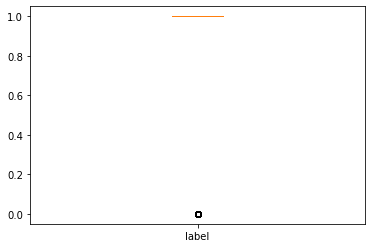

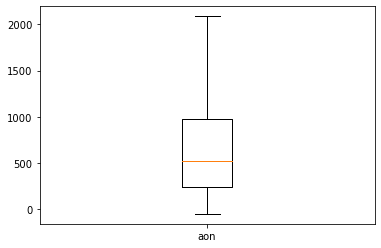

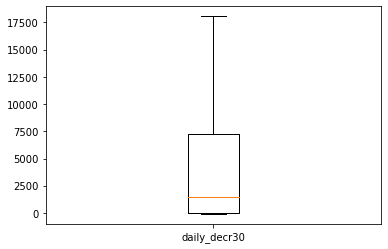

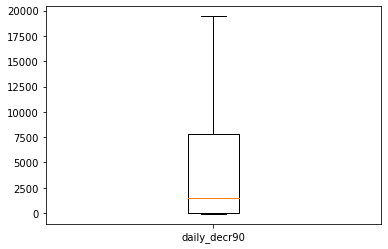

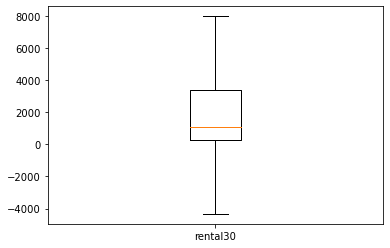

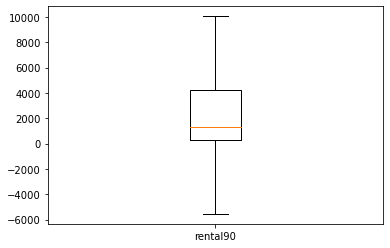

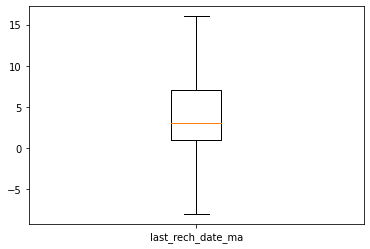

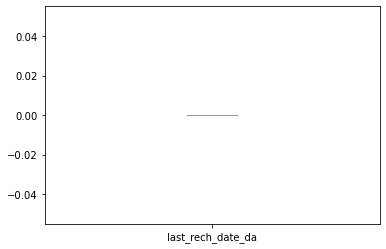

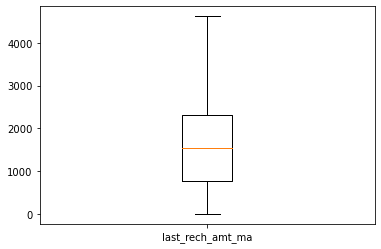

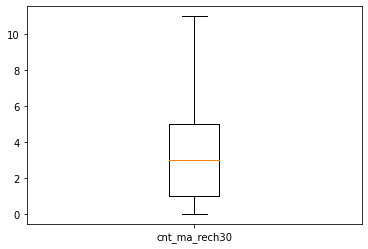

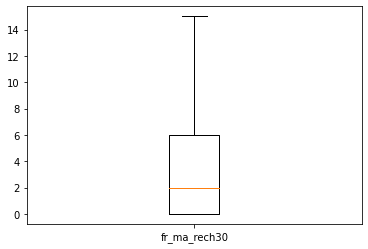

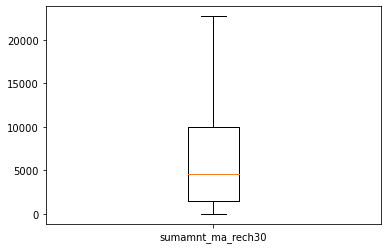

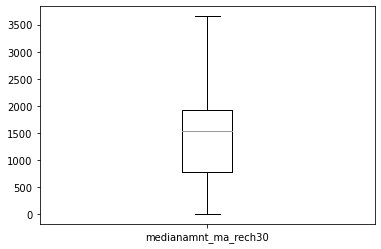

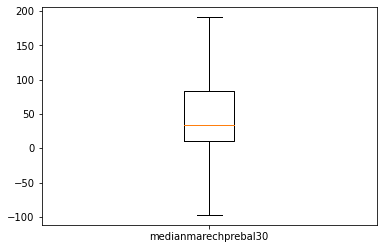

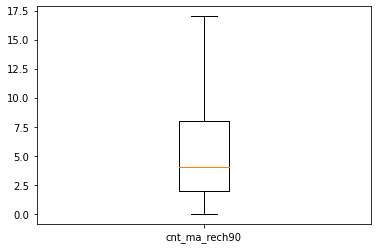

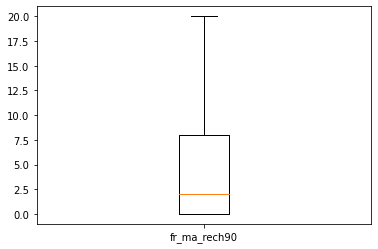

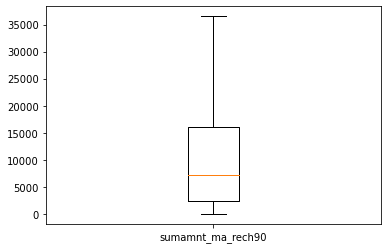

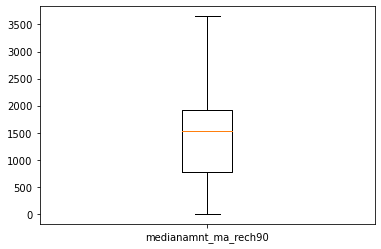

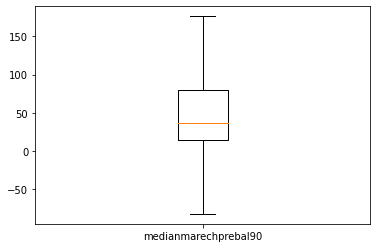

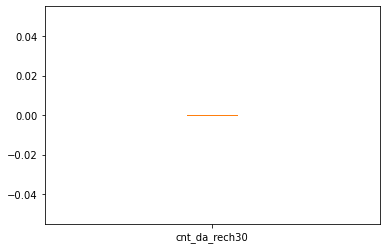

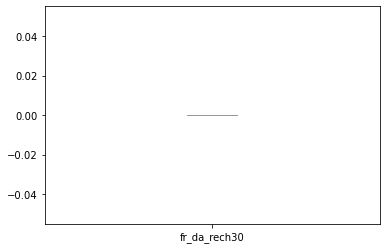

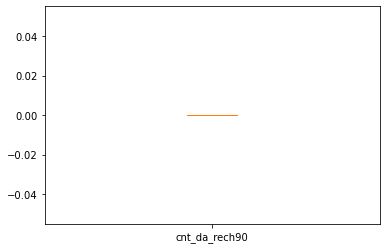

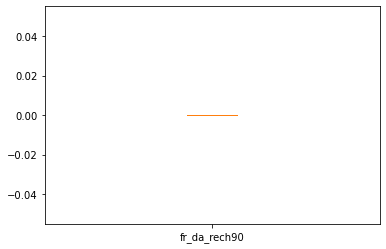

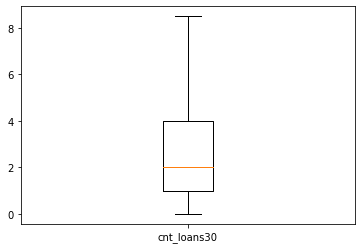

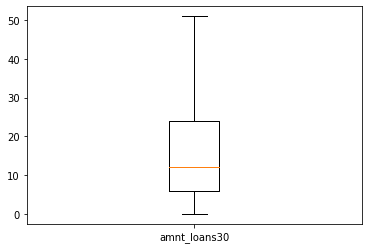

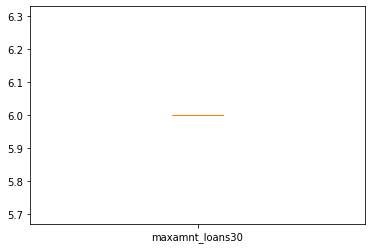

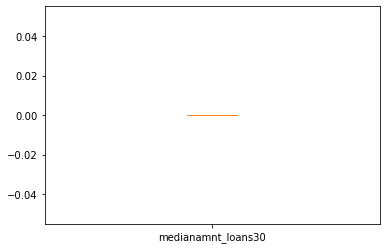

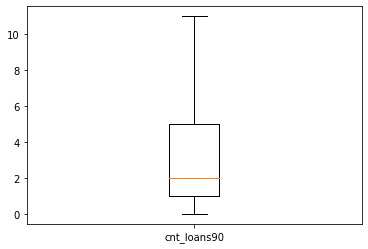

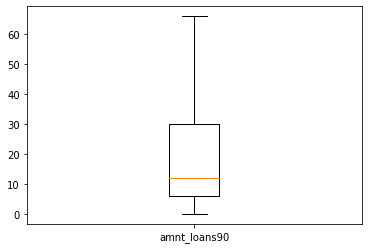

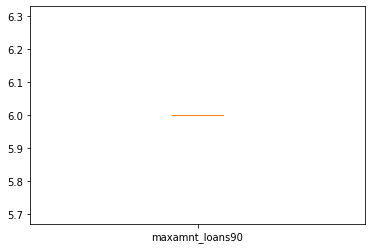

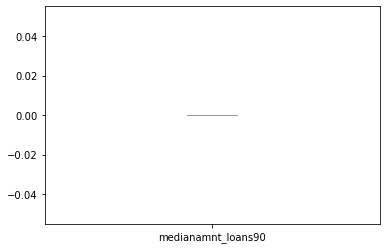

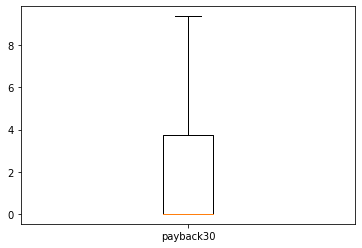

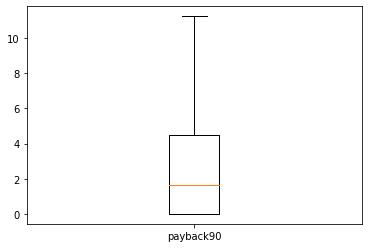

In [18]:
for i in cat_df:
    plt.boxplot(cat_df[i], labels = [i])
    plt.show()

In [19]:
for col in cat_df.columns:
    print(f"{col}: /n{cat_df[col].unique()}/n")

label: /n[0 1]/n
aon: /n[ 272.  712.  535. ... 2051. 2082. 2038.]/n
daily_decr30: /n[ 3055.05       12122.          1398.         ... 11843.11166667
 12488.22833333  4489.362     ]/n
daily_decr90: /n[ 3065.15       12124.75        1398.         ...   151.87233333
 12574.37        4534.82      ]/n
rental30: /n[ 220.13 3691.26  900.13 ... 5861.83  411.83  483.92]/n
rental90: /n[ 260.13 3691.26  900.13 ... 1728.36 8893.2   984.58]/n
last_rech_date_ma: /n[ 2. 16.  3.  4. 13.  1. 11.  8.  0.  6. 15.  7.  5. 10. 14.  9. -8. 12.
 -5. -3. -6. -4. -2. -1. -7.]/n
last_rech_date_da: /n[0.]/n
last_rech_amt_ma: /n[1539.  4617.5  947.  2309.  3178.   773.  1547.   770.     0.  4048.
  173.  1924.  2320.  2593.  1720.  3193.  1333.  4067.  3467.   777.
 1933.  1554.   790.  1580.  4340.  3466.   769.   946.  4066.  4047.
  954.   177.  1546.  1923.  1538.   772. ]/n
cnt_ma_rech30: /n[ 2  1  0  7  4  3  5 11  6  9 10  8]/n
fr_ma_rech30: /n[15.  0.  2. 10.  3.  1.  5.  6.  8. 12. 11.  4.  9. 13.  7. 14

In [20]:
cat=df.select_dtypes(include=['object'])
cat

,pcircle,pdate
0,UPW,2016-07-20
1,UPW,2016-08-10
2,UPW,2016-08-19
3,UPW,2016-06-06
4,UPW,2016-06-22
...,...,...
209588,UPW,2016-06-17
209589,UPW,2016-06-12
209590,UPW,2016-07-29
209591,UPW,2016-07-25


In [21]:
for col in cat.columns:
    print(f"{col}: /n{cat[col].unique()}/n")

pcircle: /n['UPW']/n
pdate: /n['2016-07-20' '2016-08-10' '2016-08-19' '2016-06-06' '2016-06-22'
 '2016-07-02' '2016-07-05' '2016-08-05' '2016-06-15' '2016-06-08'
 '2016-06-12' '2016-06-20' '2016-06-29' '2016-06-16' '2016-08-03'
 '2016-06-24' '2016-07-04' '2016-07-03' '2016-07-01' '2016-08-08'
 '2016-06-26' '2016-06-23' '2016-07-06' '2016-07-09' '2016-06-10'
 '2016-06-07' '2016-06-27' '2016-08-11' '2016-06-30' '2016-06-19'
 '2016-07-26' '2016-08-14' '2016-06-14' '2016-06-21' '2016-06-25'
 '2016-06-28' '2016-06-11' '2016-07-27' '2016-07-23' '2016-08-16'
 '2016-08-15' '2016-06-02' '2016-06-05' '2016-08-02' '2016-07-28'
 '2016-07-18' '2016-08-18' '2016-07-16' '2016-07-29' '2016-07-21'
 '2016-06-03' '2016-06-13' '2016-08-01' '2016-07-13' '2016-07-10'
 '2016-06-09' '2016-07-15' '2016-07-11' '2016-08-09' '2016-08-12'
 '2016-07-22' '2016-06-04' '2016-07-24' '2016-06-18' '2016-08-13'
 '2016-06-17' '2016-08-07' '2016-07-12' '2016-08-06' '2016-07-19'
 '2016-08-21' '2016-08-04' '2016-07-25' '2016-

In [22]:
cat.shape

(209593, 2)

In [23]:
cat=pd.get_dummies(cat,drop_first=True)
cat


,pdate_2016-06-02,pdate_2016-06-03,pdate_2016-06-04,pdate_2016-06-05,pdate_2016-06-06,pdate_2016-06-07,pdate_2016-06-08,pdate_2016-06-09,pdate_2016-06-10,pdate_2016-06-11,...,pdate_2016-08-12,pdate_2016-08-13,pdate_2016-08-14,pdate_2016-08-15,pdate_2016-08-16,pdate_2016-08-17,pdate_2016-08-18,pdate_2016-08-19,pdate_2016-08-20,pdate_2016-08-21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
## concatenating the dataframe

In [25]:
x1=pd.concat([cat_df,cat],axis=1)
x1.head()


,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,pdate_2016-08-12,pdate_2016-08-13,pdate_2016-08-14,pdate_2016-08-15,pdate_2016-08-16,pdate_2016-08-17,pdate_2016-08-18,pdate_2016-08-19,pdate_2016-08-20,pdate_2016-08-21
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539.0,2,...,0,0,0,0,0,0,0,0,0,0
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,16.0,0.0,4617.5,1,...,0,0,0,0,0,0,0,0,0,0
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539.0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,241.0,21.228000,21.228000,159.42,159.42,16.0,0.0,947.0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309.0,7,...,0,0,0,0,0,0,0,0,0,0


In [26]:
## shape of the x

In [27]:
x1.shape

(209593, 114)

In [28]:
x=x1.drop(['label'],axis=1)
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,pdate_2016-08-12,pdate_2016-08-13,pdate_2016-08-14,pdate_2016-08-15,pdate_2016-08-16,pdate_2016-08-17,pdate_2016-08-18,pdate_2016-08-19,pdate_2016-08-20,pdate_2016-08-21
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539.0,2,15.0,...,0,0,0,0,0,0,0,0,0,0
1,712.0,12122.000000,12124.750000,3691.26,3691.26,16.0,0.0,4617.5,1,0.0,...,0,0,0,0,0,0,0,0,0,0
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539.0,1,0.0,...,0,0,0,0,0,0,0,1,0,0
3,241.0,21.228000,21.228000,159.42,159.42,16.0,0.0,947.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309.0,7,2.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y=x1['label']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [30]:
y.shape

(209593,)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [32]:
import imblearn

In [33]:
print(imblearn.__version__)

0.9.1


In [34]:
## under sampling

In [35]:
from imblearn.under_sampling import NearMiss

under=NearMiss(version=1,n_neighbors=3)

x_smote,y_smote=under.fit_resample(x_train,y_train)


In [36]:
##x_smote.value_counts()

In [37]:
y_smote.value_counts()

0    17470
1    17470
Name: label, dtype: int64

In [38]:
y_train.value_counts()

1    122957
0     17470
Name: label, dtype: int64

In [39]:
x_smote.shape

(34940, 113)

In [40]:
y_smote.shape

(34940,)

In [41]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x_smote,y_smote,test_size=0.33,random_state=42)

In [42]:
x_train1.shape

(23409, 113)

In [43]:
y_test1.shape

(11531,)

In [44]:
x_test1.shape

(11531, 113)

In [45]:
y_train1.shape

(23409,)

In [46]:
### standardization of dataset

In [47]:
from sklearn.preprocessing import MinMaxScaler
min=MinMaxScaler()
z=min.fit_transform(x_smote)
z



array([[0.48453608, 0.00214257, 0.001989  , ..., 0.        , 0.        ,
        0.        ],
       [0.30506092, 0.45458775, 0.42562259, ..., 0.        , 0.        ,
        0.        ],
       [0.50749766, 0.00232132, 0.00215494, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.24086223, 0.05538201, 0.05141241, ..., 0.        , 0.        ,
        0.        ],
       [0.44095595, 0.08683916, 0.08061482, ..., 0.        , 0.        ,
        1.        ],
       [0.1710403 , 0.00311221, 0.00288914, ..., 0.        , 0.        ,
        0.        ]])

In [48]:
## modelling phase and training starts

In [49]:
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [50]:
## RandomForestClassifier

In [51]:
model=RandomForestClassifier()
model.fit(x_train1,y_train1)
p=model.predict(x_test1)
s=cross_val_score(model,x_smote,y_smote,cv=10)

In [52]:
print('Accuracy',np.round(accuracy_score(p,y_test1),4))
print('----------------------------------------------------------')
print('Mean of Cross Validation Score',np.round(s.mean(),4))
print('----------------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,y_test1))
print('----------------------------------------------------------')
print('Classification Report')
print(classification_report(p,y_test1))

Accuracy 0.869
----------------------------------------------------------
Mean of Cross Validation Score 0.8453
----------------------------------------------------------
Confusion Matrix
[[4916  655]
 [ 856 5104]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      5571
           1       0.89      0.86      0.87      5960

    accuracy                           0.87     11531
   macro avg       0.87      0.87      0.87     11531
weighted avg       0.87      0.87      0.87     11531



In [53]:
## decisiontreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [55]:
model.fit(x_train1,y_train1)
p=model.predict(x_test1)
s=cross_val_score(model,x_smote,y_smote,cv=10)

In [56]:
print('Accuracy',np.round(accuracy_score(p,y_test1),4))
print('----------------------------------------------------------')
print('Mean of Cross Validation Score',np.round(s.mean(),4))
print('----------------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,y_test1))
print('----------------------------------------------------------')
print('Classification Report')
print(classification_report(p,y_test1))

Accuracy 0.8186
----------------------------------------------------------
Mean of Cross Validation Score 0.7966
----------------------------------------------------------
Confusion Matrix
[[4715 1035]
 [1057 4724]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      5750
           1       0.82      0.82      0.82      5781

    accuracy                           0.82     11531
   macro avg       0.82      0.82      0.82     11531
weighted avg       0.82      0.82      0.82     11531



In [57]:
## kneighborsClassifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [59]:
model.fit(x_train1,y_train1)
p=model.predict(x_test1)
s=cross_val_score(model,x_smote,y_smote,cv=10)

In [60]:
print('Accuracy',np.round(accuracy_score(p,y_test1),4))
print('----------------------------------------------------------')
print('Mean of Cross Validation Score',np.round(s.mean(),4))
print('----------------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,y_test1))
print('----------------------------------------------------------')
print('Classification Report')
print(classification_report(p,y_test1))

Accuracy 0.7609
----------------------------------------------------------
Mean of Cross Validation Score 0.6955
----------------------------------------------------------
Confusion Matrix
[[4137 1122]
 [1635 4637]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      5259
           1       0.81      0.74      0.77      6272

    accuracy                           0.76     11531
   macro avg       0.76      0.76      0.76     11531
weighted avg       0.76      0.76      0.76     11531



In [61]:
## gradientBoosting classifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()

In [63]:
## training

In [64]:
model.fit(x_train1,y_train1)
p=model.predict(x_test1)
s=cross_val_score(model,x_smote,y_smote,cv=10)

In [65]:
print('Accuracy',np.round(accuracy_score(p,y_test1),4))
print('----------------------------------------------------------')
print('Mean of Cross Validation Score',np.round(s.mean(),4))
print('----------------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,y_test1))
print('----------------------------------------------------------')
print('Classification Report')
print(classification_report(p,y_test1))

Accuracy 0.8459
----------------------------------------------------------
Mean of Cross Validation Score 0.842
----------------------------------------------------------
Confusion Matrix
[[4667  672]
 [1105 5087]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      5339
           1       0.88      0.82      0.85      6192

    accuracy                           0.85     11531
   macro avg       0.85      0.85      0.85     11531
weighted avg       0.85      0.85      0.85     11531



In [66]:
## ada boost classifier

In [67]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()

In [68]:
model.fit(x_train1,y_train1)
p=model.predict(x_test1)
s=cross_val_score(model,x_smote,y_smote,cv=10)

In [69]:
print('Accuracy',np.round(accuracy_score(p,y_test1),4))
print('----------------------------------------------------------')
print('Mean of Cross Validation Score',np.round(s.mean(),4))
print('----------------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,y_test1))
print('----------------------------------------------------------')
print('Classification Report')
print(classification_report(p,y_test1))

Accuracy 0.8419
----------------------------------------------------------
Mean of Cross Validation Score 0.8356
----------------------------------------------------------
Confusion Matrix
[[4753  804]
 [1019 4955]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      5557
           1       0.86      0.83      0.84      5974

    accuracy                           0.84     11531
   macro avg       0.84      0.84      0.84     11531
weighted avg       0.84      0.84      0.84     11531



In [70]:
## hyper paramter tuning for random forest classifier

In [71]:
params={'n_estimators':[100, 300, 500, 700],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40]}

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
g=RandomizedSearchCV(RandomForestClassifier(),params,cv=10)

In [74]:
g.fit(x_train1,y_train1)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 15, 20, 25, 30,
                                                      35, 40],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 300, 500, 700]})

In [75]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestClassifier(max_depth=40, min_samples_leaf=3, min_samples_split=3)
{'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 40}
0.8639419015177238


In [76]:
m=RandomForestClassifier(max_depth=40, min_samples_leaf=3, min_samples_split=3,n_estimators=100)
m.fit(x_train1,y_train1)
p=m.predict(x_test1)
score=cross_val_score(m,x_smote,y_smote,cv=10)

In [77]:
print('Accuracy',np.round(accuracy_score(p,y_test1),4))
print('----------------------------------------------------------')
print('Mean of Cross Validation Score',np.round(s.mean(),4))
print('----------------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,y_test1))
print('----------------------------------------------------------')
print('Classification Report')
print(classification_report(p,y_test1))

Accuracy 0.8641
----------------------------------------------------------
Mean of Cross Validation Score 0.8356
----------------------------------------------------------
Confusion Matrix
[[4889  684]
 [ 883 5075]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      5573
           1       0.88      0.85      0.87      5958

    accuracy                           0.86     11531
   macro avg       0.86      0.86      0.86     11531
weighted avg       0.86      0.86      0.86     11531



In [ ]:
## testing the model

In [82]:
import numpy as np

In [90]:
a=np.array(y_test1)
a

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [91]:
pred=np.array(m.predict(x_test1))
pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [92]:
df_com=pd.DataFrame({'predicted':pred,'actual':a},index=range(len(a)))

In [89]:
df_com

,predicted,actual
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
11526,0,0
11527,0,0
11528,0,0
11529,1,1


In [93]:
## saving the model

In [94]:
import pickle

In [96]:
filename='micro_credit_defaulter.pkl'


In [97]:
pickle.dump(m,open(filename,'wb'))